# A One-To-One Model

In [24]:
import tensorflow as tf
import matplotlib.pyplot as plt
print(f'TF VERSION: {tf.__version__}')

TF VERSION: 2.14.0


## Mock some data

In [2]:
indVarTensor = tf.range(-100,100,4)
indVarTensor

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [3]:
depVarTensor = indVarTensor * 10
depVarTensor

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-1000,  -960,  -920,  -880,  -840,  -800,  -760,  -720,  -680,
        -640,  -600,  -560,  -520,  -480,  -440,  -400,  -360,  -320,
        -280,  -240,  -200,  -160,  -120,   -80,   -40,     0,    40,
          80,   120,   160,   200,   240,   280,   320,   360,   400,
         440,   480,   520,   560,   600,   640,   680,   720,   760,
         800,   840,   880,   920,   960], dtype=int32)>

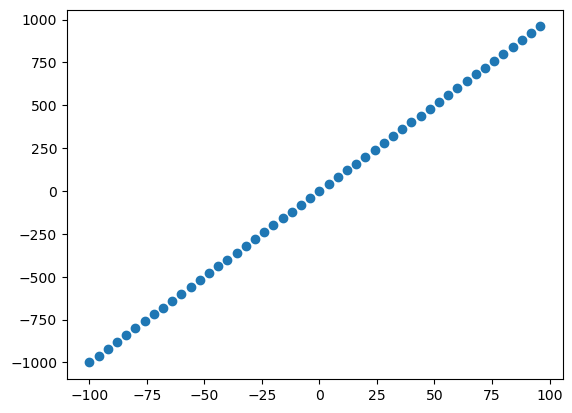

In [4]:
plt.scatter(indVarTensor, depVarTensor)

## Split Data Into 3
- **Training**: model learns from this data, typically 7080% of the data
- **Validation**: model gets "tuned" on this, typically 10-15% of data
- **Test**: the model's learning gets evaluated on this, typically 10-15% of data

Here, we'll split the data into training & validation. the Test data will be manual at the end.

In [5]:
len(depVarTensor)

50

In [6]:
x_train = indVarTensor[:40] #first 40
y_train = depVarTensor[:40]  #last 10

x_test = indVarTensor[40:]
y_test = depVarTensor[40:]

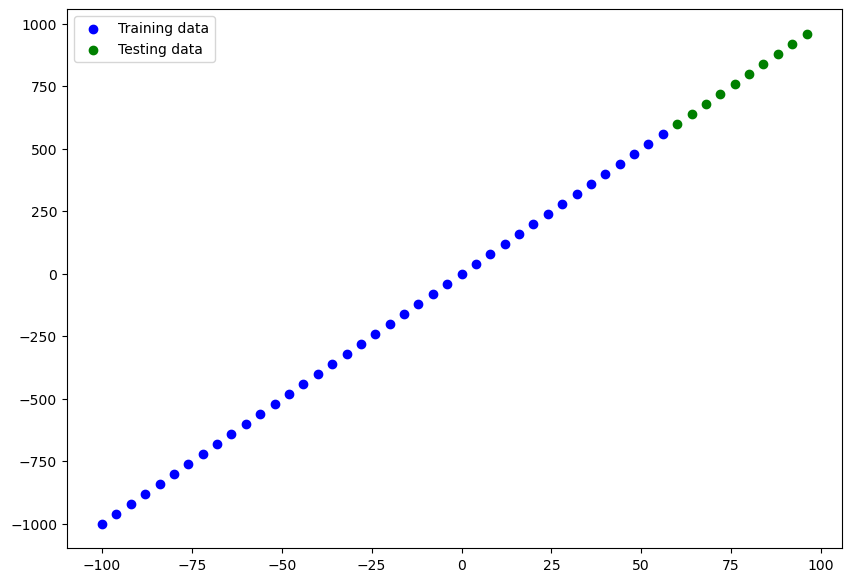

In [7]:
plt.figure(figsize=(10, 7))
# TRAINING
plt.scatter(x_train, y_train, c='b', label='Training data')
# TESTING
plt.scatter(x_test, y_test, c='g', label='Testing data')
plt.legend();

## Create & Visualize a model

In [8]:
# increase repeatability
tf.random.set_seed(42)

m = tf.keras.Sequential()
# layers
mL1 = tf.keras.layers.Dense(1, input_shape=[1])
# mL2 = tf.keras.layers.Dense(1)
m.add(mL1)
# m.add(mL2)
m.compile(loss=tf.keras.losses.mae,
          # optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
          optimizer=tf.keras.optimizers.SGD(),
          metrics=["mae"])

## Sumarizing the model

In [9]:
# https://www.tensorflow.org/api_docs/python/tf/keras/Model#summary
m.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Fit The Model To The Data

In [10]:
m.fit(tf.expand_dims(x_train, axis=-1), y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 1s 26ms/step - loss: 384.8997 - mae: 384.8997
Epoch 2/100
2/2 [==============================] - 0s 14ms/step - loss: 348.9157 - mae: 348.9157
Epoch 3/100
2/2 [==============================] - 0s 14ms/step - loss: 310.7949 - mae: 310.7949
Epoch 4/100
2/2 [==============================] - 0s 14ms/step - loss: 273.9105 - mae: 273.9105
Epoch 5/100
2/2 [==============================] - 0s 14ms/step - loss: 237.2411 - mae: 237.2411
Epoch 6/100
2/2 [==============================] - 0s 15ms/step - loss: 202.5008 - mae: 202.5008
Epoch 7/100
2/2 [==============================] - 0s 13ms/step - loss: 167.9083 - mae: 167.9083
Epoch 8/100
2/2 [==============================] - 0s 14ms/step - loss: 130.7788 - mae: 130.7788
Epoch 9/100
2/2 [==============================] - 0s 15ms/step - loss: 88.3749 - mae: 88.3749
Epoch 10/100
2/2 [==============================] - 0s 16ms/step - loss: 50.5085 - mae: 50.5085
Epoch 11/100
2/2 [===============

In [11]:
## Build some prediction data
predictions = m.predict(x_test)
predictions

1/1 [==============================] - 0s 196ms/step


array([[574.31793],
       [612.6054 ],
       [650.8929 ],
       [689.1804 ],
       [727.46796],
       [765.75543],
       [804.0429 ],
       [842.33044],
       [880.618  ],
       [918.90546]], dtype=float32)

## Evaluating A Model's Predictions
### Plot It
Plot 3 datasets: train data, test data, and prediction data.  

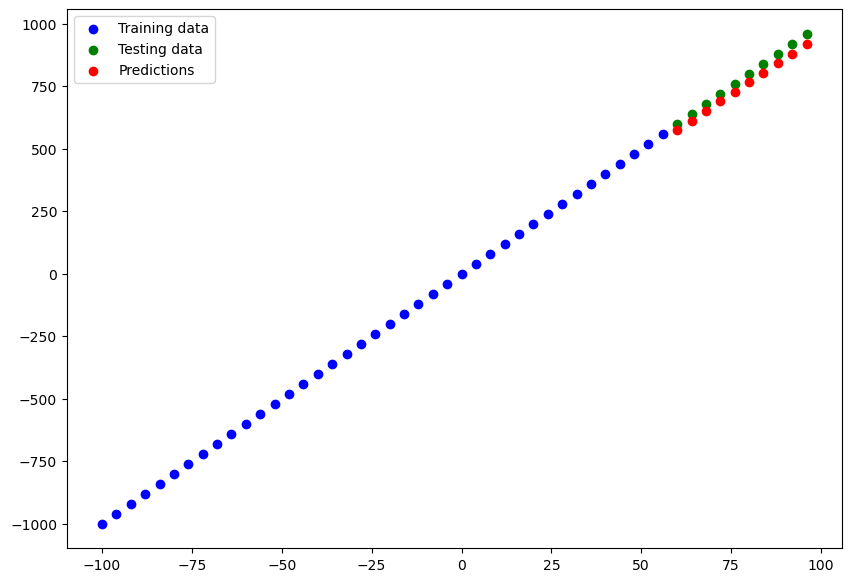

In [12]:
def plot_predictions(train_data=x_train, 
                     train_labels=y_train, 
                     test_data=x_test, 
                     test_labels=y_test, 
                     predictions=predictions):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

plot_predictions()

### Regression Evaluation Metrics
Different evaluation metrics exist. Regressions commonly use MAE and 
- **MAE** (mean avg error): on average how "wrong" each prediction is. a great "starter metric" for any regression
- **MSE** (mean squared error): square the errors, then find the avg. Useful when larger errors are more significant than smaller errors

In [13]:
m.evaluate(x_test, y_test)

1/1 [==============================] - 0s 381ms/step - loss: 33.3883 - mae: 33.3883


[33.3883171081543, 33.3883171081543]

In [21]:
# get err of EACH test input
# NOTE: the tensors have to be the same "shape", and the predictions are NOT the same shape
#   as the test data
squeezedPredictions = tf.squeeze(predictions)
# y_test.shape, predictions.shape, squeezedPredictions.shape

myMas = tf.metrics.mean_absolute_error(y_true=y_test,
                             y_pred=squeezedPredictions)
myMas

<tf.Tensor: shape=(), dtype=float32, numpy=33.388317>

In [23]:
myMse = tf.metrics.mean_squared_error(y_true=y_test,
                             y_pred=squeezedPredictions)
myMse

<tf.Tensor: shape=(), dtype=float32, numpy=1138.974>